In [73]:
#import library
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [74]:
#membaca gambar
img = cv2.imread('citra.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [87]:
#range warna
# Blue
lower_blue = np.array([20, 10, 10])
upper_blue = np.array([124, 175, 175])
lower_blue_dark = np.array([100, 50, 50])
upper_blue_dark = np.array([140, 255, 255])

# Red
lower_red = np.array([0, 5, 5])
upper_red = np.array([5, 175, 175])
lower_red_dark = np.array([0, 50, 50])
upper_red_dark = np.array([10, 255, 255])
lower_red_alt_dark = np.array([170, 50, 50])
upper_red_alt_dark = np.array([180, 255, 255])

# Green
lower_green = np.array([20, 10, 10])
upper_green = np.array([30, 175, 175])
lower_green_dark = np.array([60, 50, 50])
upper_green_dark = np.array([80, 255, 255])

# None
lower_none = np.array([0, 0,0])
upper_none = np.array([0, 0,0])

In [88]:
#mendeteksi warna
mask_blue = cv2.inRange(hsv_img, lower_blue, upper_blue) + cv2.inRange(hsv_img, lower_red_dark, upper_red_dark) + cv2.inRange(hsv_img, lower_red_alt_dark, upper_red_alt_dark) + cv2.inRange(hsv_img, lower_green_dark, upper_green_dark)
mask_red = cv2.inRange(hsv_img, lower_green_dark, upper_green_dark) +  cv2.inRange(hsv_img, lower_blue, upper_blue) + cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_red, upper_red)
mask_green = cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_red_dark, upper_red_dark) + cv2.inRange(hsv_img, lower_red_alt_dark, upper_red_alt_dark)+ cv2.inRange(hsv_img, lower_green_dark, upper_green_dark)
mask_none = cv2.inRange(img_rgb, lower_none, upper_none)

mask_blue2 = cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark)
mask_red_blue = cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_red_dark, upper_red_dark) + cv2.inRange(hsv_img, lower_red_alt_dark, upper_red_alt_dark)
mask_red_green_blue = cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_red_dark, upper_red_dark) + cv2.inRange(hsv_img, lower_red_alt_dark, upper_red_alt_dark) + cv2.inRange(hsv_img, lower_green_dark, upper_green_dark) +cv2.inRange(hsv_img, lower_blue, upper_blue)

# Invert coler
mask_blue_inv = cv2.bitwise_not(mask_blue)
mask_red_inv = cv2.bitwise_not(mask_red)
mask_green_inv = cv2.bitwise_not(mask_green)

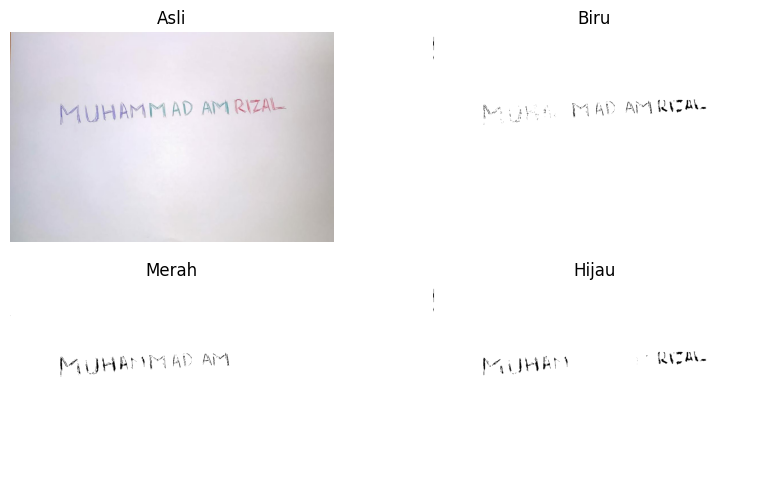

In [99]:
#menampilakan gambar hasil deteksi warna
#Asli
plt.figure(figsize=(10,6))
plt.subplot(2,2, 1)
plt.imshow(img_rgb)
plt.title('Asli')
plt.axis('off')
#biru
plt.subplot(2, 2,2 )
plt.imshow(mask_blue_inv, cmap='gray')
plt.title('Biru')
plt.axis('off')

#merah
plt.subplot(2,2,3)
plt.imshow(mask_red_inv, cmap='gray')
plt.title('Merah')
plt.axis('off')

#hijau
plt.subplot(2,2,4)
plt.imshow(mask_green_inv, cmap='gray')
plt.title('Hijau')
plt.axis('off')
plt.show()

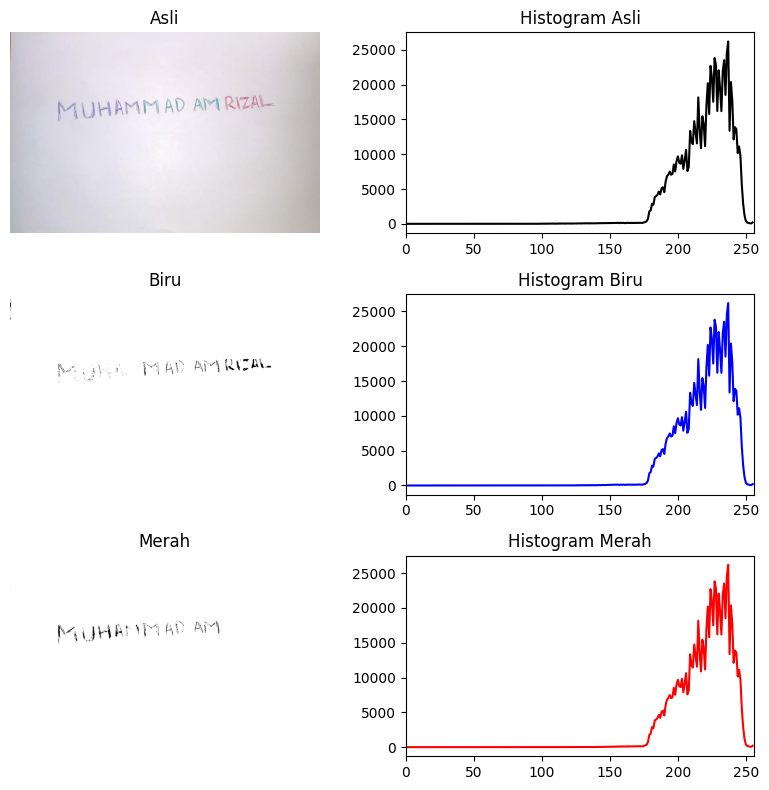

In [116]:
# Hitung histogram untuk setiap gambar
hist_img_rgb = cv2.calcHist([img_rgb], [0], None, [256], [0, 256])
hist_mask_blue_inv = cv2.calcHist([img_rgb], [0], mask_blue_inv, [256], [0, 256])
hist_mask_red_inv = cv2.calcHist([img_rgb], [0], mask_red_inv, [256], [0, 256])
hist_mask_green_inv = cv2.calcHist([img_rgb], [0], mask_green_inv, [256], [0, 256])

# Menampilkan gambar hasil deteksi warna dan histogram
plt.figure(figsize=(8, 8))

# Gambar asli dan histogramnya
plt.subplot(3, 2, 1)
plt.imshow(img_rgb)
plt.title('Asli')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.plot(hist_img_rgb, color='black')
plt.title('Histogram Asli')
plt.xlim([0, 256])

# Mask Biru dan histogramnya
plt.subplot(3, 2, 3)
plt.imshow(mask_blue_inv, cmap='gray')
plt.title('Biru')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.plot(hist_mask_blue_inv, color='blue')
plt.title('Histogram Biru')
plt.xlim([0, 256])

# Mask Merah dan histogramnya
plt.subplot(3, 2, 5)
plt.imshow(mask_red_inv, cmap='gray')
plt.title('Merah')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.plot(hist_mask_red_inv, color='red')
plt.title('Histogram Merah')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

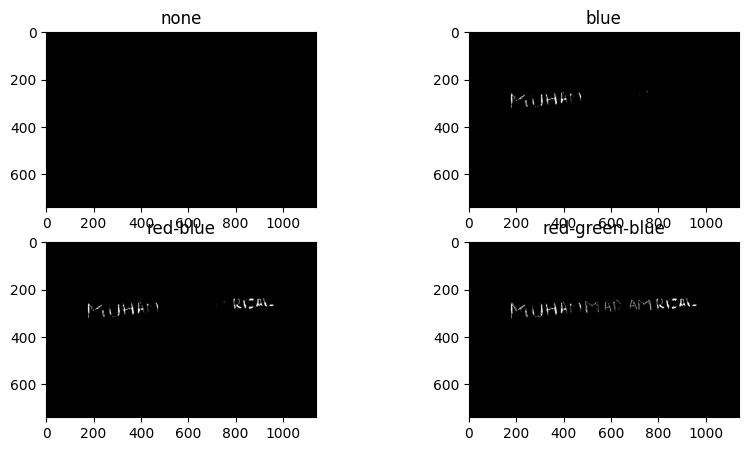

In [107]:
#none
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(mask_none, cmap='gray')
plt.title('none')

#biru
plt.subplot(2,2,2)
plt.imshow(mask_blue2, cmap='gray')
plt.title('blue')

#red-blue
plt.subplot(2,2,3)
plt.imshow(mask_red_blue, cmap='gray')
plt.title('red-blue')

#plt.figure(figsize=(30, 8))
plt.subplot(2,2, 4)
plt.imshow(mask_red_green_blue, cmap='gray')
plt.title('red-green-blue')
plt.show()

In [109]:
#ambang batas
hue_channel = hsv_img[:,:,0]

# Temukan ambang batas untuk setiap saluran warna
_, blue_thresh = cv2.threshold(hue_channel, 100, 130, cv2.THRESH_BINARY)
_, red1_thresh = cv2.threshold(hue_channel, 0, 10, cv2.THRESH_BINARY)
_, red2_thresh = cv2.threshold(hue_channel, 170, 180, cv2.THRESH_BINARY)
_, green_thresh = cv2.threshold(hue_channel, 40, 80, cv2.THRESH_BINARY)

# Gabungkan semua ambang batas dan hapus duplikat
all_thresholds = np.unique(np.concatenate((blue_thresh, red1_thresh, red2_thresh, green_thresh)))

# Urutkan ambang batas dari terkecil hingga terbesar
sorted_thresholds = np.sort(all_thresholds)

print("Ambang Batas Terkecil hingga Terbesar:")
print(sorted_thresholds)


Ambang Batas Terkecil hingga Terbesar:
[  0  10  80 130 180]
